In [1]:
import os
import pickle
from collections import defaultdict
from typing import Dict, List, Optional

import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot(methods, labels: List[str], eps: int, criteria: str, reg_type: str, save: Optional[bool] = False):        
    for method, label in zip(methods, labels):
        with open(f"reports/{reg_type}_regularized/{method}_{eps}.pkl", "rb") as f:
            history = pickle.load(f)
        if method == "sinkhorn":
            # First experiments were conducted for different convention  
            if reg_type == "entropy":
                plt.plot(history, label=label)
            else:
                plt.plot(history["conv_crit"], label=label)
        else:
            plt.plot(history[criteria], label=label)
    
    if criteria == "criteria_one":
        plt.ylabel(r'$\langle C, \hat{X} - X_k \rangle$', fontsize=12)
    elif criteria == "criteria_two":
        if reg_type == "entropy":
            plt.ylabel(r'$f(X_k) + \varphi(X_k)$', fontsize=12)
        elif reg_type == "euclidean":
            plt.ylabel(r'$f(X_k) - \varphi(X_k)$', fontsize=12)
        else:
            raise ValueError(f"Unknown criteria: {criteria}")
    plt.yscale("log")
    
    plt.xlabel('$k$, iterations number', fontsize=12)
    plt.xscale("log")
    
    plt.grid(alpha=0.4)
    # plt.title(r"Entropy Regularized, $\dfrac{1}{\varepsilon}$="+str(int(1/eps)), fontsize=16)
    # plt.title(r"Entropy Regularized, $\varepsilon$="+f"{eps:.5f}", fontsize=16)
    plt.legend()
    plt.tight_layout()
    if save:
        plt.savefig(f"plots/{reg_type}_regularized_{criteria}_{eps}.pdf")
    plt.show()

In [3]:
x_array = np.linspace(1/2e-2, 1/4e-4, 6)
epslist = 1/x_array
epslist

array([0.02      , 0.00185185, 0.00097087, 0.00065789, 0.00049751,
       0.0004    ])

In [4]:
chosen_epslist = 1/x_array[[0, 1, 4]]
chosen_epslist

array([0.02      , 0.00185185, 0.00049751])

# Entropy regularized

In [ ]:
methods_entropy = ["sinkhorn", "apdagd", "pdaam", "pdaam-ls"]
labels_entropy = ["Sinkhorn", "APDAGD", "PDAAM", "PDAAM-LS"]

In [ ]:
plot(methods_entropy, labels_entropy, 0.001851851851851852, "criteria_one", "entropy")

In [ ]:
plot(methods_entropy, labels_entropy, 0.001851851851851852, "criteria_two", "entropy")

In [ ]:
for eps in epslist:
    plot(methods_entropy, labels_entropy, eps, "criteria_one", "entropy")
    plot(methods_entropy, labels_entropy, eps, "criteria_two", "entropy")

In [ ]:
for eps in chosen_epslist:
    plot(methods_entropy, labels_entropy, eps, "criteria_one", "entropy", True)
    plot(methods_entropy, labels_entropy, eps, "criteria_two", "entropy", True)

# Euclidean regularized

In [5]:
methods_euclidean = ["sinkhorn", "apdagd", "pdaam", "clvr"]
labels_euclidean = ["Sinkhorn", "APDAGD", "PDAAM", "CLVR"]

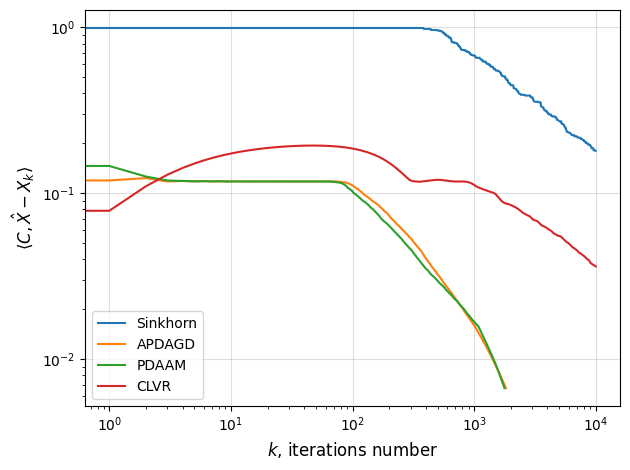

In [6]:
plot(methods_euclidean, labels_euclidean, epslist[0], "criteria_one", "euclidean")

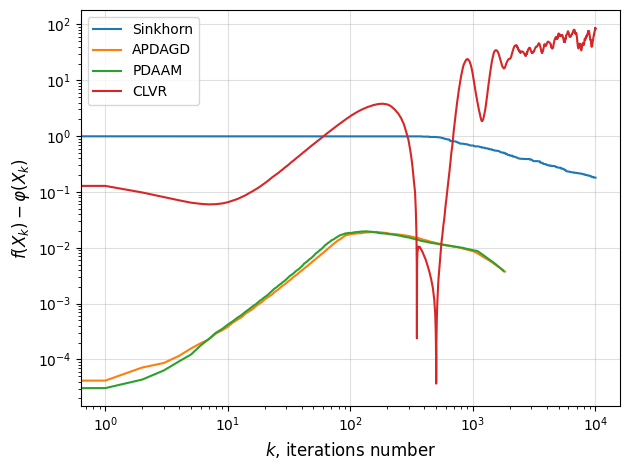

In [7]:
plot(methods_euclidean, labels_euclidean, epslist[0], "criteria_two", "euclidean")

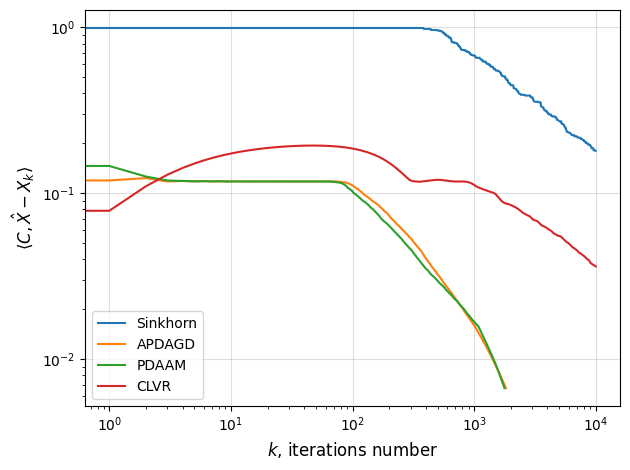

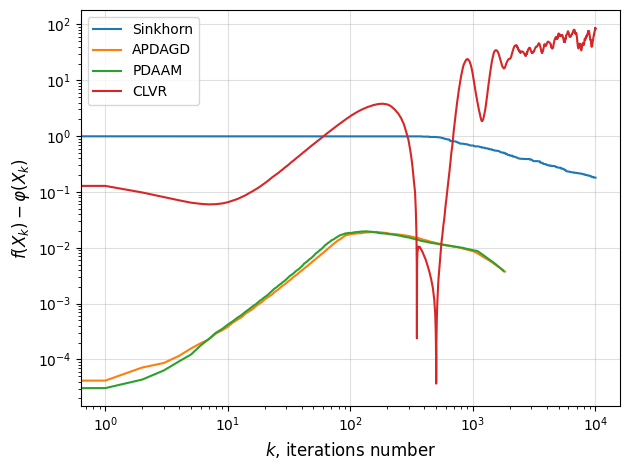

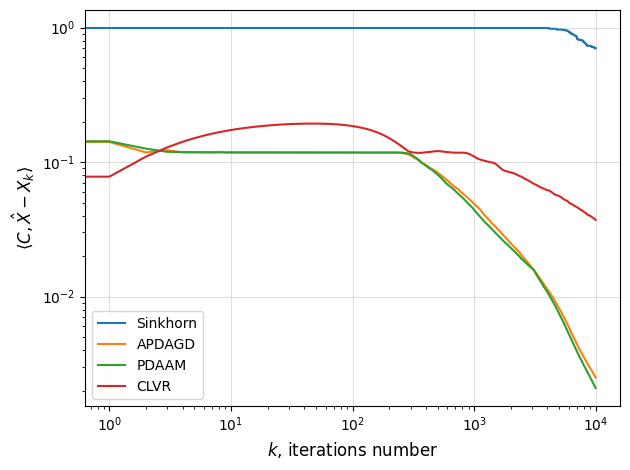

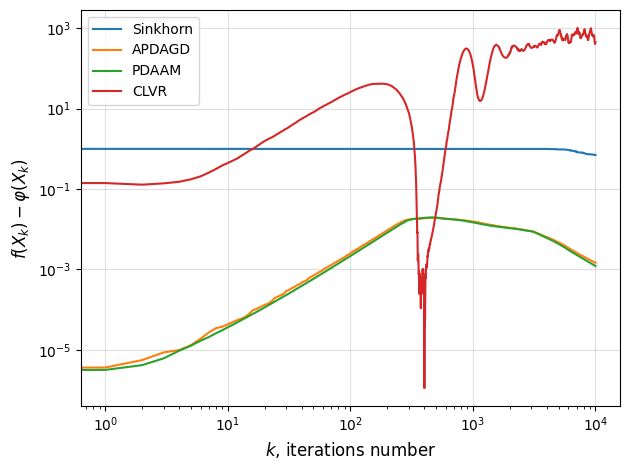

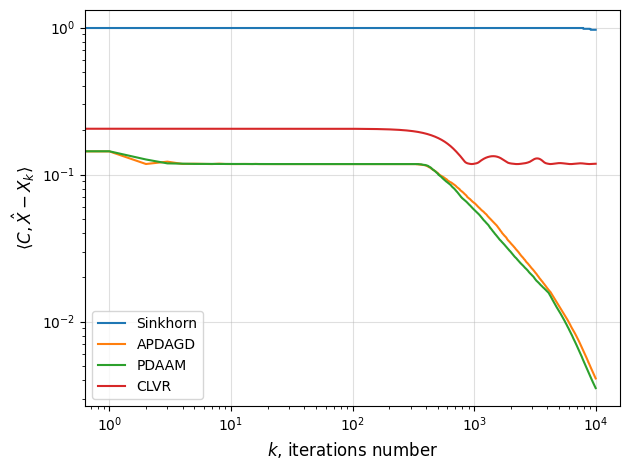

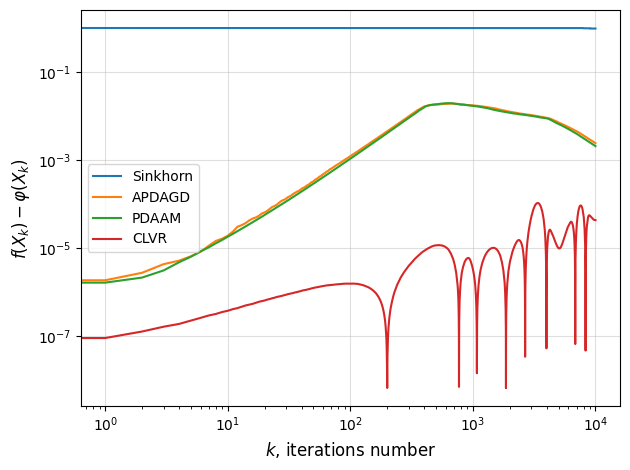

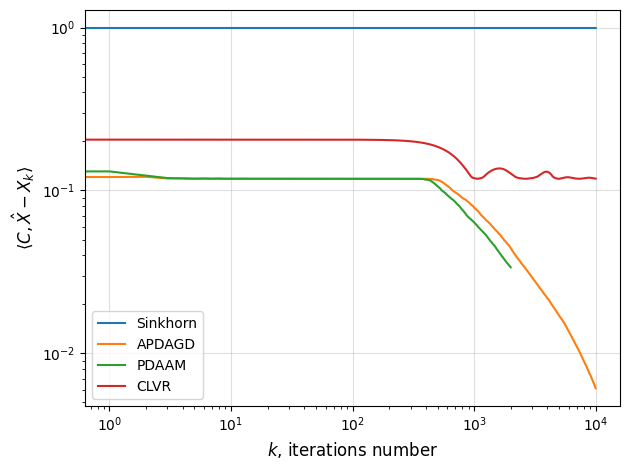

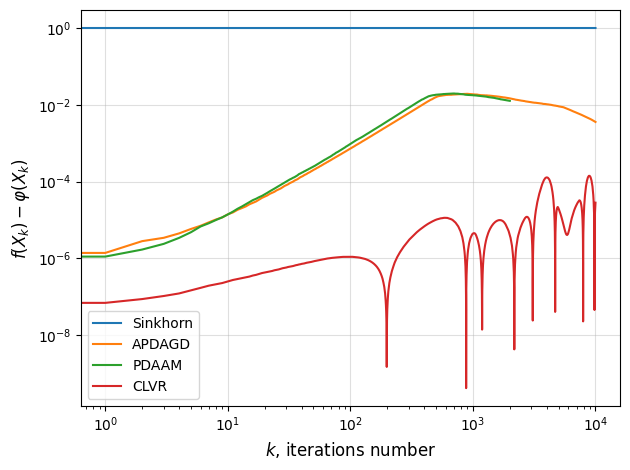

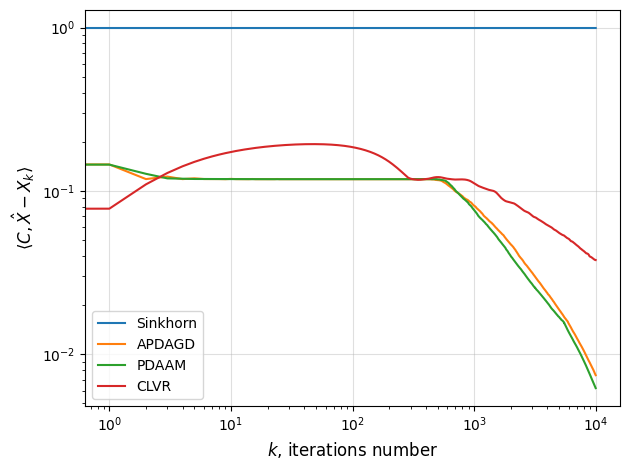

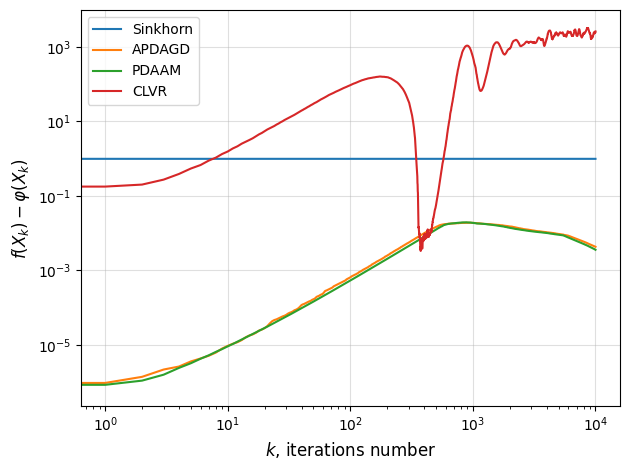

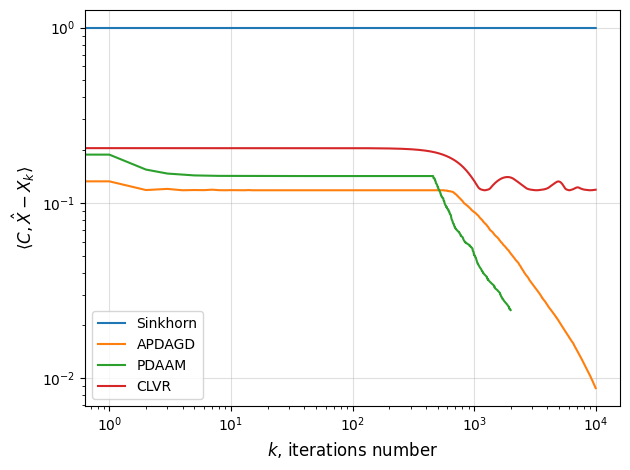

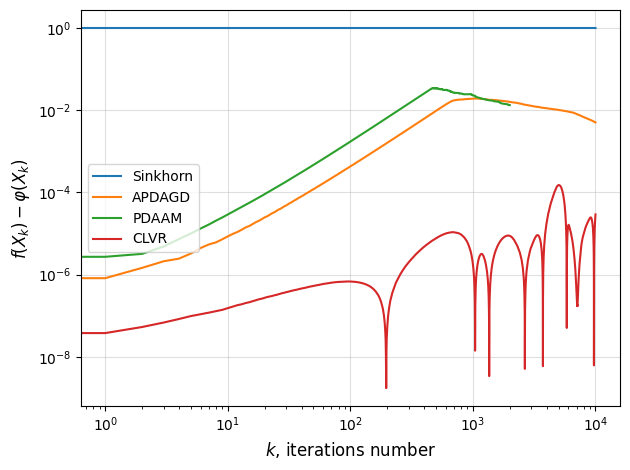

In [8]:
for eps in epslist:
    plot(methods_euclidean, labels_euclidean, eps, "criteria_one", "euclidean")
    plot(methods_euclidean, labels_euclidean, eps, "criteria_two", "euclidean")

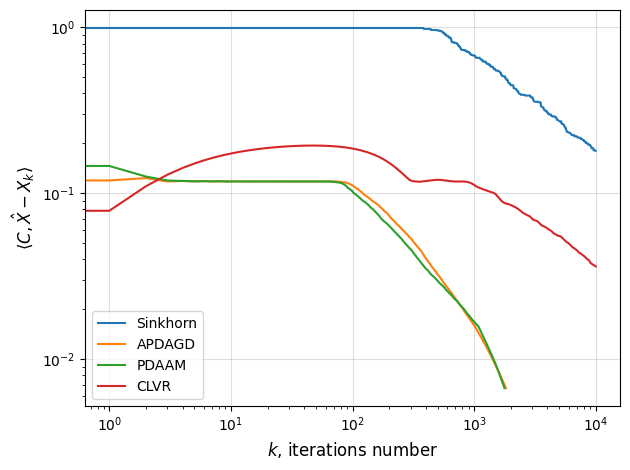

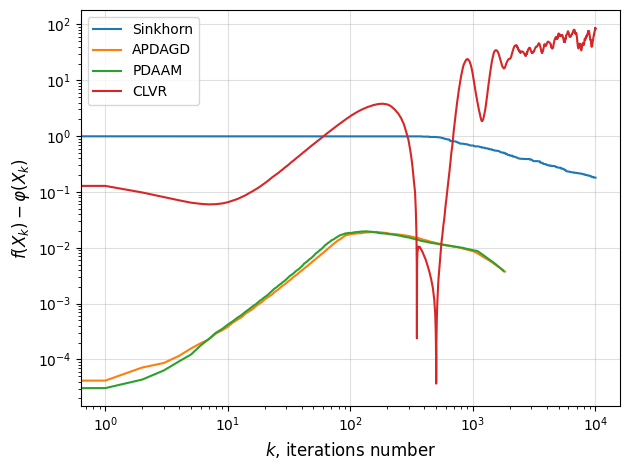

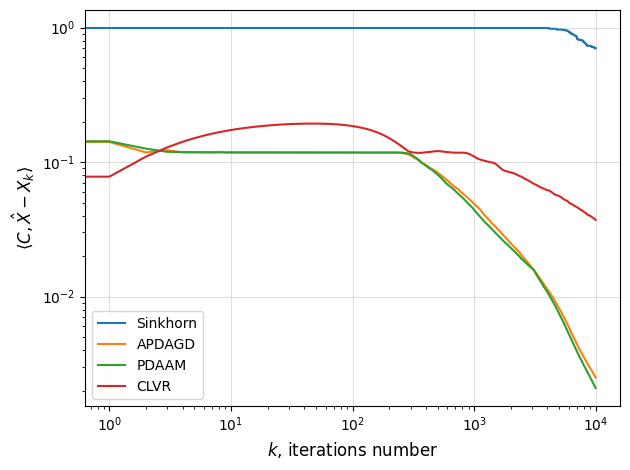

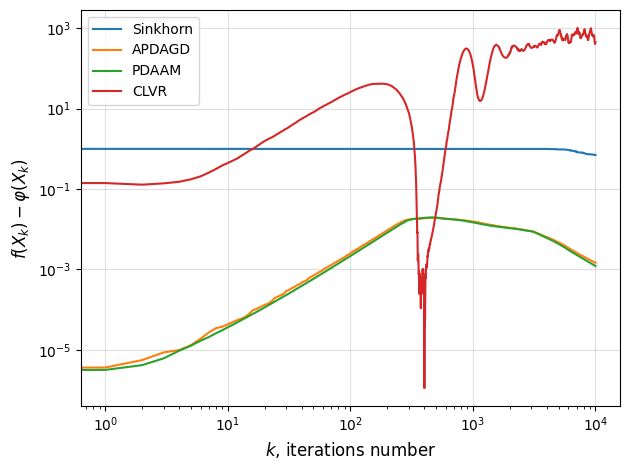

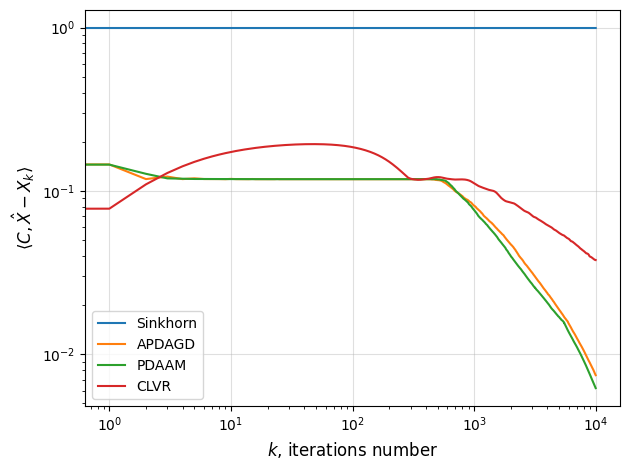

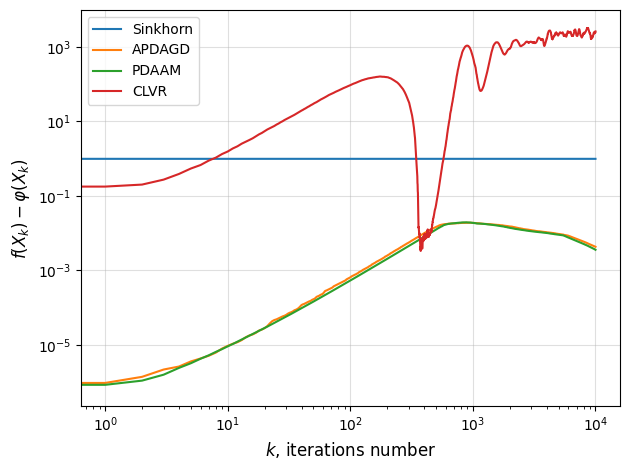

In [9]:
for eps in chosen_epslist:
    plot(methods_euclidean, labels_euclidean, eps, "criteria_one", "euclidean", True)
    plot(methods_euclidean, labels_euclidean, eps, "criteria_two", "euclidean", True)

# OT Matrix

In [ ]:
import pickle

import numpy as np
from mnist import MNIST
from ot.plot import plot1D_mat, plot2D_samples_mat
from scipy.spatial.distance import cdist

In [ ]:
# https://pypi.org/project/python-mnist
mndata = MNIST('./data/')
images, labels = mndata.load_training()

In [ ]:
n = len(images[0])
m = int(np.sqrt(n))

def mnist(eps, p, q):
    p, q = np.float64(images[p]), np.float64(images[q])
    p, q = p / sum(p), q / sum(q)
    
    p = (1-eps/8)*p + eps/(8*n)
    q = (1-eps/8)*q + eps/(8*n)
    
    return p, q

def cartesian_product(*arrays):
    la = len(arrays)
    dtype = np.result_type(*arrays)
    arr = np.empty([len(a) for a in arrays] + [la], dtype=dtype)
    for i, a in enumerate(np.ix_(*arrays)):
        arr[...,i] = a
    return arr.reshape(-1, la)

C = np.arange(m)
C = cartesian_product(C, C)
C = cdist(C, C)
C /= np.max(C)
C.max()

In [ ]:
#experiments were done for
p_list = [34860, 31226,   239, 37372, 17390]
q_list = [45815, 35817, 43981, 54698, 49947]

In [ ]:
def get_X(eps: float):
    with open(f"reports/euclidean_regularized/apdagd_{eps}_x.pkl", "rb") as f:
        x = pickle.load(f)
    return x

In [ ]:
x = get_X(0.02)

In [ ]:
x.shape

In [ ]:
import pylab as pl  # do the plots

In [ ]:
x.max()

In [ ]:
for eps in chosen_epslist:
    x = get_X(eps)
    print(x.max())

In [ ]:
f = pl.figure(3, (14, 5))
pl.clf()
max_ot = 0.007569195924922672 / 10000 #0.007569195924922672  # plot matrices with the same colorbar
for k, eps in enumerate(chosen_epslist):
    x = get_X(eps)
    ax = pl.subplot(1, 3, k + 1)
    im = pl.imshow(x, vmin=0, vmax=max_ot)
    pl.title(r'$\varepsilon=$' + f'{eps:.5f}',fontsize=18)
    #pl.xlabel('Image Pixels 1')
    #pl.ylabel('Image Pixels 2')

    # Hide X and Y axes label marks
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.yaxis.set_tick_params(labelleft=False)

    # Hide X and Y axes tick marks
    ax.set_xticks([])
    ax.set_yticks([])
pl.tight_layout(pad=2.5)
pl.savefig(f"plots/X.pdf")
pl.show()

# N($\varepsilon$)

In [ ]:
methods = ["sinkhorn", "apdagd", "pdaam"]
labels = ["Sinkhorn", "APDAGD", "PDAAM"]

In [ ]:
method_to_label = {method: label for method, label in zip(methods, labels)}

In [ ]:
def plot_N_varepsilon(
    epslist: List[float], method_to_label: Dict[str, str], criteria: str, reg_type: str, save: Optional[bool] = False
):
    method_to_x = defaultdict(list)
    method_to_y = defaultdict(list)
    for eps in epslist:
        for method, label in method_to_label.items():
            with open(f"reports/{reg_type}_regularized/{method}_{eps}.pkl", "rb") as f:
                history = pickle.load(f)
            method_to_x[method].append(1 / eps)
            if method == "sinkhorn":
                method_to_y[method].append(len(history))
                #method_to_y[method].append(len(history["conv_crit"]))
            else:
                method_to_y[method].append(len(history[criteria]))

    for method, label in method_to_label.items():
        plt.plot(method_to_x[method], method_to_y[method], label=label)

    # plt.ylabel("N (log. scale)")
    # plt.yscale("log")
    plt.ylabel("N")

    # plt.xlabel(r"$\dfrac{1}{\varepsilon}$ (log. scale)", fontsize=12)
    # plt.xscale("log")
    plt.xlabel(r"$1/\varepsilon$", fontsize=12)

    plt.grid(alpha=0.4)
    #     if criteria == "criteria_one":
    #         # plt.title(r"$\langle C, \hat{X} - X_k \rangle$ (log. scale)", fontsize=16)
    #         plt.title(r"$\langle C, \hat{X} - X_k \rangle$", fontsize=16)
    #     elif criteria == "criteria_two":
    #         # plt.title(r"$f(X_k) + \varphi(X_k)$ (log. scale)", fontsize=16)
    #         plt.title(r"$f(X_k) + \varphi(X_k)$", fontsize=16)
    #     else:
    #         raise ValueError(f"Unknown criteria: {criteria}")
    plt.legend()
    plt.tight_layout()
    if save:
        plt.savefig(f"plots/N_eps_{criteria}_{reg_type}.pdf")
    plt.show()


In [ ]:
plot_N_varepsilon(epslist, method_to_label, "criteria_one", "entropy")#, True)

In [ ]:
plot_N_varepsilon(epslist, method_to_label, "criteria_two", "entropy")#, True)

In [ ]:
plot_N_varepsilon(epslist, method_to_label, "criteria_one", "euclidean")